In [1]:
import sys 
from pathlib import Path
sys.path.append(str(Path().cwd().parent))
images_path = Path().cwd().parent/"images"

import numpy as np
import matplotlib.pyplot as plt
from src.core import MeasurementStatisticsSimulator
from src.sim_funcs import decaying_poisson, perfect_poisson, cascade_cnots_entangling_noise, average_error, optimising_threshold, snr
from src.utils import plot_constant_error, plot_lowest_errors, dir_images

In [4]:
mu0 = 35/10
mu1 = 140/10
lam = -np.log(0.96)/10

t_list = np.append(np.arange(0.01, 2.5, 0.01), np.arange(2.6, 7.5, 0.1))
q_list = np.arange(1, 11)

In [ ]:
# WARNING: Takes a long time to run

ground_state_params = {"mu": mu0}
excited_state_params = {"mu0": mu0, "mu1": mu1, "lam": lam}
threshold_function_params = {"mu0": mu0, "mu1": mu1}
error_function_params = {}

for p in (0.01, 0.001):
    for q in q_list:
        threshold_function_params = {"mu0": q*mu0, "mu1": q*mu1}
        entangling_noise_params = {"p": p}
        sim = MeasurementStatisticsSimulator(q, cascade_cnots_entangling_noise, entangling_noise_params, perfect_poisson, ground_state_params, decaying_poisson, 
                                                             excited_state_params, optimising_threshold, dict(threshold_function_params), average_error, error_function_params)
        sim.find_k_max(t_list[-1], int(2*t_list[-1]*mu1*q), False)
        sim.simulate(t_list)
        sim.calculate_threshold()
        sim.calculate_error()
    
        sim.save(f"{sim.N}q_7_5t_{str(p).replace('.', '_')}p_noisy_experimental_params.txt", mode="w")

In [4]:
def get_simulators_0_01():
    simulator_list = []
    
    for q in q_list:
        simulator = MeasurementStatisticsSimulator.load(f"{q}q_7_5t_0_01p_noisy_experimental_params.txt")
        simulator_list.append(simulator)

    return simulator_list

def get_simulators_0_001():
    simulator_list = []
    
    for q in q_list:
        simulator = MeasurementStatisticsSimulator.load(f"{q}q_7_5t_0_001p_noisy_experimental_params.txt")
        simulator_list.append(simulator)

    return simulator_list

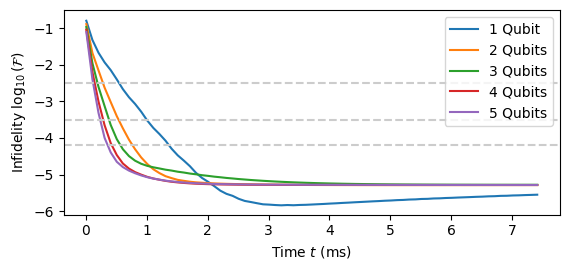

In [31]:
sim_list = get_simulators_0_01()

fontsize = 10
error_list = (-2.5, -3.5, -4.2)
fig, ax = plt.subplots()

for sim in sim_list[:5]:
    sim.plot_error(label=f"{sim.N} Qubit{'' if sim.N == 1 else 's'}",t_transform=None, e_transform=np.log)

for err in error_list:
    plt.axhline(y=err, color='0.8', linestyle='--')

plt.title("")
plt.xlabel(r"Time $t$ (ms)", fontsize=fontsize)
plt.ylabel(r"Infidelity $\log_{10}(\mathcal{F})$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(prop={'size': fontsize})

plt.ylim([-6.1,-0.5])
ax.set_aspect(0.6)
plt.show()

In [32]:
# fig.savefig(dir_images/"fidelity_noisy_experimental_squashed_import.svg", format="svg", dpi=300)

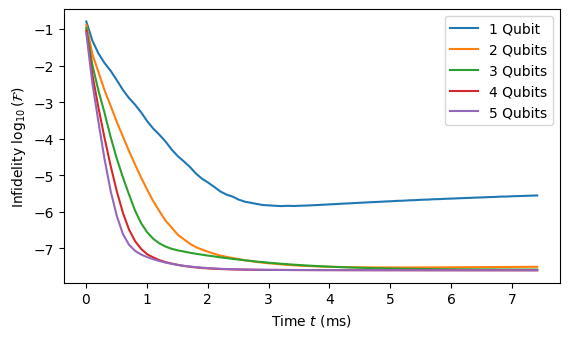

In [35]:
sim_list = get_simulators_0_001()

fontsize = 10
error_list = (-2.5, -3.5, -4.2)
fig, ax = plt.subplots()

for sim in sim_list[:5]:
    sim.plot_error(label=f"{sim.N} Qubit{'' if sim.N == 1 else 's'}", t_transform=None, e_transform=np.log)

plt.title("")
plt.xlabel(r"Time $t$ (ms)", fontsize=fontsize)
plt.ylabel(r"Infidelity $\log_{10}(\mathcal{F})$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(prop={'size': fontsize})
ax.set_aspect(0.6)
plt.show()

In [36]:
# fig.savefig(dir_images/"fidelity_noisy_experimental_001p_import.svg", format="svg", dpi=300)

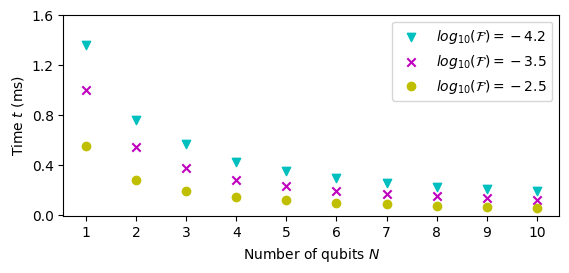

In [22]:
sim_list = get_simulators_0_01()

fig, ax = plt.subplots()
for error, color, marker in zip(np.exp(np.array(error_list))[::-1], ("c", "m", "y"), ("v", "x", "o")):
    plot_constant_error(sim_list, error, label=r"$\log_{10}(\mathcal{F})$"+fr"$={np.log(error)}$", color=color, marker=marker)
    
plt.xlabel("Number of qubits $N$", fontsize=fontsize)
plt.ylabel("Time $t$ (ms)", fontsize=fontsize)
plt.legend(prop={'size': fontsize})
plt.xticks(range(1,11,1), fontsize=fontsize)
plt.yticks(np.arange(0,1.7,0.4), fontsize=fontsize)
ax.set_aspect(2.5)
plt.show()

In [23]:
# fig.savefig(dir_images/"fidelity_noisy_experimental_const_squashed_import.svg", format="svg", dpi=300)

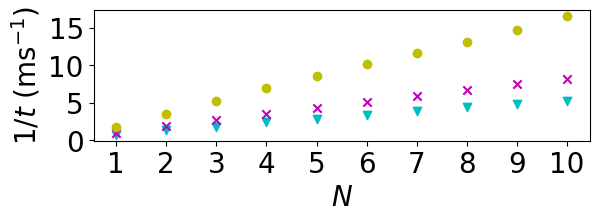

In [24]:
fontsize = 20

fig, ax = plt.subplots()
for error, color, marker in zip(np.exp(np.array(error_list))[::-1], ("c", "m", "y"), ("v", "x", "o")):
    plot_constant_error(sim_list, error, False, True, color=color, marker=marker)

plt.xlabel("$N$", fontsize=fontsize)
plt.ylabel("$1/t$ (ms$^{-1}$)", fontsize=fontsize)
plt.xticks(range(1,11,1), fontsize=fontsize)
plt.yticks(fontsize=fontsize)

ax.set_aspect(0.15)
plt.show()

In [25]:
# fig.savefig(dir_images/"fidelity_noisy_experimental_const_inset_squashed_import.svg", format="svg", dpi=300)

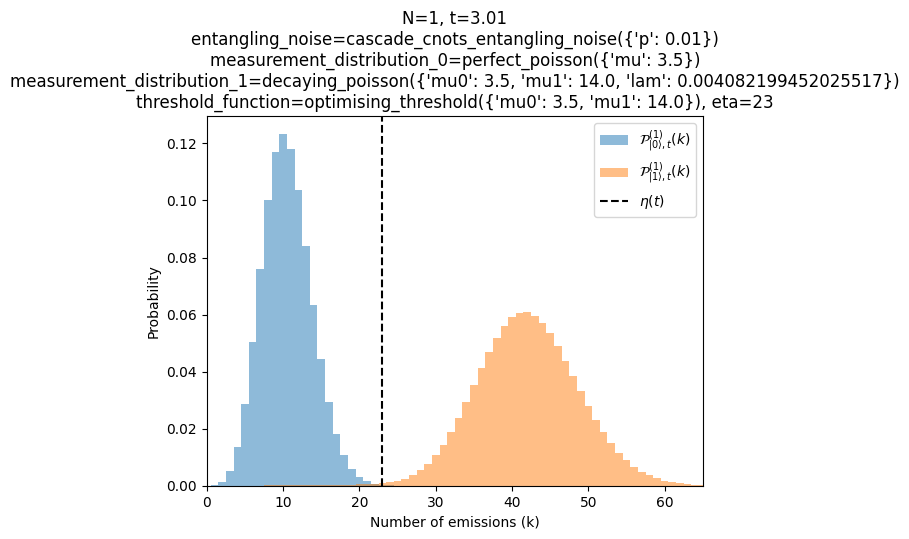

In [7]:
# Measurement statistics p=0.01
sim_list = get_simulators_0_01()

fig, ax = plt.subplots()
sim_list[0].plot_measurement_statistics(254, kwargs_0={"label": r"$\mathcal{P}_{|0\rangle,t}^{(1)}(k)$", "alpha": 0.5}, kwargs_1={"label": r"$\mathcal{P}_{|1\rangle,t}^{(1)}(k)$", "alpha": 0.5})
plt.xlabel("Number of emissions (k)")
plt.title("")
plt.xlim([0,65])
plt.show()

In [29]:
# fig.savefig(dir_images/"fidelity_noisy_experimental_measurement_stats_1N_import.svg", format="svg", dpi=300)

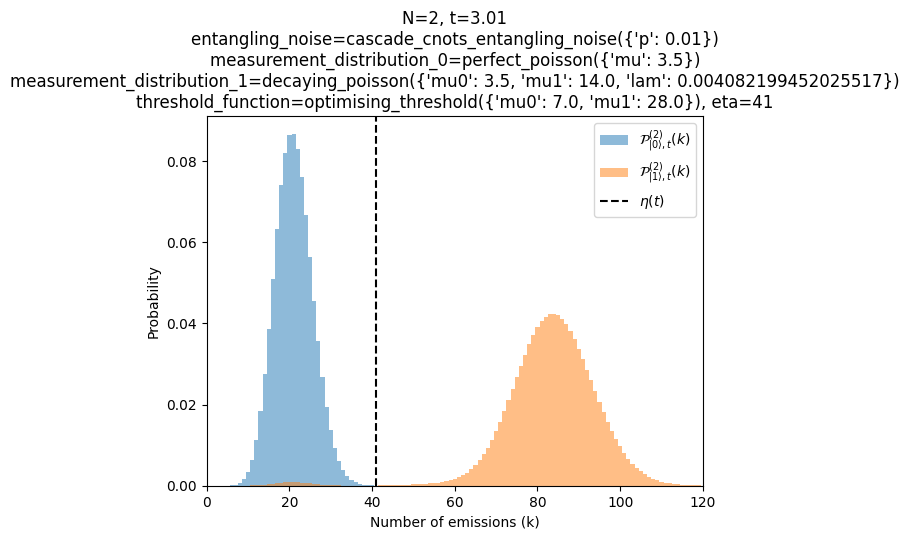

In [8]:
sim_list = get_simulators_0_01()

fig, ax = plt.subplots()
sim_list[1].plot_measurement_statistics(254, kwargs_0={"label": r"$\mathcal{P}_{|0\rangle,t}^{(2)}(k)$", "alpha": 0.5}, kwargs_1={"label": r"$\mathcal{P}_{|1\rangle,t}^{(2)}(k)$", "alpha": 0.5})
plt.xlabel("Number of emissions (k)")
plt.xlim([0,120])
plt.title("")
plt.show()

In [31]:
# fig.savefig(dir_images/"fidelity_noisy_experimental_measurement_stats_2N_import.svg", format="svg", dpi=300)

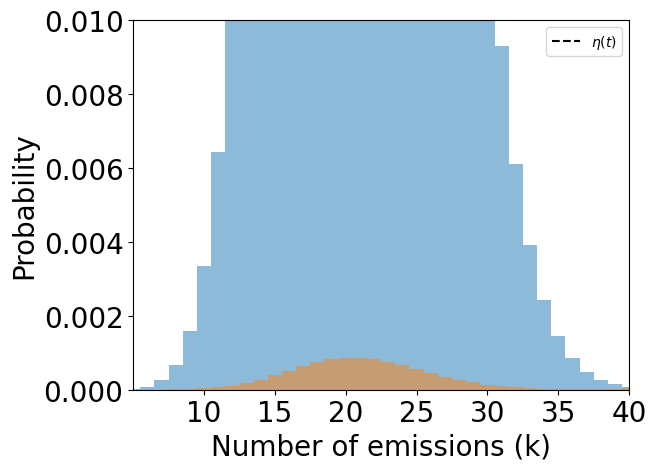

In [36]:
sim_list = get_simulators_0_01()

fig, ax = plt.subplots()
fontsize=20
sim_list[1].plot_measurement_statistics(254, kwargs_0={"label": "", "alpha": 0.5}, kwargs_1={"label": "", "alpha": 0.5})

plt.xlabel("Number of emissions (k)", fontsize=fontsize)
plt.ylabel("Probability", fontsize=fontsize)
plt.xlim([5,40])
plt.ylim([0,0.01])
plt.xticks(np.arange(10,41,5), fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.title("")
plt.show()

In [37]:
# fig.savefig(dir_images/"fidelity_noisy_experimental_measurement_stats_2N_zoom_import.svg", format="svg", dpi=300)

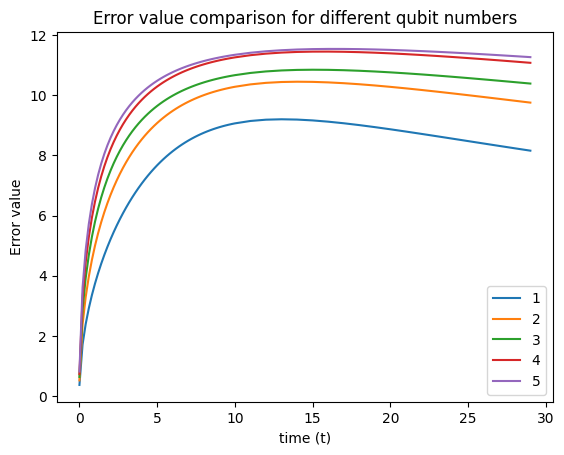

In [9]:
#Check SNR is as expected
sim_list = get_simulators_0_01()

for sim in sim_list[:5]:
    sim.error_function = snr
    sim.error_function_params = {}
    sim.calculate_error()
    sim.plot_error(label=f"{sim.N}")

plt.legend()
plt.title("SNR error value comparison for different qubit numbers")
plt.show()